<a href="https://colab.research.google.com/github/nnbphuong/datascience4biz/blob/master/Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RECOMMENDATION SYSTEMS
> Phuong Nguyen @ [DataScience.vn](https://DataScience.vn)
> 
> Dataset: https://gist.github.com/nnbphuong/016093619a86f643211211779592e336
> 
> https://gist.github.com/nnbphuong/ef07850a13de09f3029f34e4a4333576

# Association Rules

In [1]:
%matplotlib inline

from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

!pip install scikit-surprise
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split


     |████████████████████████████████| 6.5MB 2.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675733 sha256=b79b7814dc0a6968e7a6b4c37753f1b92dd8e8d6de17e9523f96581ed3695b14
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


## Association Rules for Faceplate Example

In [3]:
# Load and preprocess dataset 
fp_df = pd.read_csv('https://gist.githubusercontent.com/nnbphuong/016093619a86f643211211779592e336/raw/a98c0144b442eafebadb2ca841f7ae68e7261a71/Faceplate.csv')
fp_df.set_index('Transaction', inplace=True)
fp_df

,Red,White,Blue,Orange,Green,Yellow
Transaction,,,,,,
1,1,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,1,0,0,0
4,1,1,0,1,0,0
5,1,0,1,0,0,0
6,0,1,1,0,0,0
7,1,0,1,0,0,0
8,1,1,1,0,1,0
9,1,1,1,0,0,0


In [5]:
# create frequent itemsets
itemsets = apriori(fp_df, min_support=0.2, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)

print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

       antecedents   consequents  support  confidence      lift  leverage
13    (White, Red)       (Green)      0.2         0.5  2.500000      0.12
15         (Green)  (White, Red)      0.2         1.0  2.500000      0.12
4          (Green)         (Red)      0.2         1.0  1.666667      0.08
12  (White, Green)         (Red)      0.2         1.0  1.666667      0.08
7         (Orange)       (White)      0.2         1.0  1.428571      0.06
8          (Green)       (White)      0.2         1.0  1.428571      0.06


In [6]:
# filter to get rules with single consequents only
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['lift'], ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(White, Red)",(Green),0.4,0.2,0.2,0.5,2.500000,0.12,1.6
4,(Green),(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf
12,"(White, Green)",(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf
7,(Orange),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf
8,(Green),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf
14,"(Green, Red)",(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf


## Association Rules for Random Data

In [7]:
# Prepare the dataset
from itertools import chain
randomTransactions = [{8}, {3,4,8}, {8}, {3,9}, {9}, {1,8}, {6,9}, {3,5,7,9}, {8}, set(), 
                      {1,7,9}, {1,4,5,8,9}, {5,7,9}, {6,7,8}, {3,7,9}, {1,4,9}, {6,7,8}, {8}, set(), {9},
                      {2,5,6,8}, {4,6,9}, {4,9}, {8,9}, {6,8}, {1,6,8}, {5,8}, {4,8,9}, {9}, {8},
                      {1,5,8}, {3,6,9}, {7,9}, {7,8,9}, {3,4,6,8}, {1,4,8}, {4,7,8}, {8,9}, {4,5,7,9}, {2,8,9},
                      {2,5,9}, {1,2,7,9}, {5,8}, {1,7,8}, {8}, {2,7,9}, {4,6,9}, {9}, {9}, {6,7,8}]
print(randomTransactions)
uniqueItems = sorted(set(chain.from_iterable(randomTransactions)))
randomData = pd.DataFrame(0, index=range(len(randomTransactions)), columns=uniqueItems)
for row, transaction in enumerate(randomTransactions):
    for item in transaction:
        randomData.loc[row][item] = 1
randomData.head()

[{8}, {8, 3, 4}, {8}, {9, 3}, {9}, {8, 1}, {9, 6}, {9, 3, 5, 7}, {8}, set(), {1, 9, 7}, {1, 4, 5, 8, 9}, {9, 5, 7}, {8, 6, 7}, {9, 3, 7}, {1, 4, 9}, {8, 6, 7}, {8}, set(), {9}, {8, 2, 5, 6}, {9, 4, 6}, {9, 4}, {8, 9}, {8, 6}, {8, 1, 6}, {8, 5}, {8, 9, 4}, {9}, {8}, {8, 1, 5}, {9, 3, 6}, {9, 7}, {8, 9, 7}, {8, 3, 4, 6}, {8, 1, 4}, {8, 4, 7}, {8, 9}, {9, 4, 5, 7}, {8, 9, 2}, {9, 2, 5}, {1, 2, 9, 7}, {8, 5}, {8, 1, 7}, {8}, {9, 2, 7}, {9, 4, 6}, {9}, {9}, {8, 6, 7}]


,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [8]:
# create frequent itemsets
itemsets = apriori(randomData, min_support=2/len(randomData), use_colnames=True)
# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.7)
print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

  antecedents consequents  support  confidence      lift  leverage
3      (8, 3)         (4)     0.04         1.0  4.545455    0.0312
1      (1, 5)         (8)     0.04         1.0  1.851852    0.0184
2      (2, 7)         (9)     0.04         1.0  1.851852    0.0184
4      (3, 4)         (8)     0.04         1.0  1.851852    0.0184
5      (3, 7)         (9)     0.04         1.0  1.851852    0.0184
6      (4, 5)         (9)     0.04         1.0  1.851852    0.0184


## Association Rules for Similar Book Purchases

In [10]:
# load dataset
all_books_df = pd.read_csv('https://gist.githubusercontent.com/nnbphuong/ef07850a13de09f3029f34e4a4333576/raw/0f920e9173ca2c2d63861025d85d80e3505346e8/CharlesBookClub.csv')

# create the binary incidence matrix
ignore = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase',
          'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']
count_books = all_books_df.drop(columns=ignore)
count_books[count_books > 0] = 1

count_books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


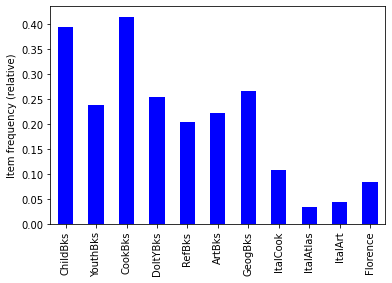

In [11]:
# determine item frequencies
itemFrequency = count_books.sum(axis=0) / len(count_books)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [12]:
# create frequent itemsets and rules
itemsets = apriori(count_books, min_support=200/4000, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

print('Number of rules', len(rules))

# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)

pd.set_option('precision', 5)
pd.set_option('display.width', 100)
print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.set_option('precision', 6)

Number of rules 81
                      antecedents          consequents  ...     lift  leverage
64             (RefBks, YouthBks)  (CookBks, ChildBks)  ...  2.80992   0.03559
73             (RefBks, DoItYBks)  (CookBks, ChildBks)  ...  2.73621   0.03886
60           (YouthBks, DoItYBks)  (CookBks, ChildBks)  ...  2.68145   0.04201
80              (RefBks, GeogBks)  (CookBks, ChildBks)  ...  2.54000   0.03047
69            (GeogBks, YouthBks)  (CookBks, ChildBks)  ...  2.50109   0.03796
77            (GeogBks, DoItYBks)  (CookBks, ChildBks)  ...  2.47525   0.03606
66   (CookBks, GeogBks, ChildBks)           (YouthBks)  ...  2.42445   0.03716
71    (CookBks, RefBks, ChildBks)           (DoItYBks)  ...  2.32301   0.03488
48            (GeogBks, DoItYBks)           (YouthBks)  ...  2.26486   0.03044
62    (CookBks, RefBks, ChildBks)           (YouthBks)  ...  2.24057   0.03059
58  (CookBks, DoItYBks, ChildBks)           (YouthBks)  ...  2.20131   0.03656
57  (CookBks, YouthBks, ChildBks)

In [13]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) == 1 for c in rules.consequents]]

rules.sort_values(by=['lift'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(GeogBks, DoItYBks)",(YouthBks),0.10100,0.23825,0.05450,0.539604,2.264864,0.030437,1.654554
34,"(RefBks, ChildBks)",(DoItYBks),0.12825,0.25475,0.07100,0.553606,2.173135,0.038328,1.669490
20,"(GeogBks, ChildBks)",(YouthBks),0.14625,0.23825,0.07550,0.516239,2.166797,0.040656,1.574642
45,"(CookBks, GeogBks)",(YouthBks),0.15625,0.23825,0.08025,0.513600,2.155719,0.043023,1.566098
17,"(YouthBks, ChildBks)",(DoItYBks),0.14750,0.25475,0.08025,0.544068,2.135693,0.042674,1.634563
50,"(CookBks, RefBks)",(DoItYBks),0.13975,0.25475,0.07450,0.533095,2.092619,0.038899,1.596148
23,"(CookBks, ChildBks)",(DoItYBks),0.24200,0.25475,0.12775,0.527893,2.072198,0.066101,1.578560
47,"(GeogBks, YouthBks)",(DoItYBks),0.10450,0.25475,0.05450,0.521531,2.047227,0.027879,1.557573
41,"(CookBks, YouthBks)",(DoItYBks),0.16100,0.25475,0.08375,0.520186,2.041948,0.042735,1.553207
43,"(RefBks, YouthBks)",(CookBks),0.08125,0.41550,0.06825,0.840000,2.021661,0.034491,3.653125


# Collaborative filtering

## Collaborative Filtering for Tiny Netflix 

In [14]:
ratings = pd.DataFrame([
    [30878, 1, 4], [30878, 5, 1], [30878, 18, 3], [30878, 28, 3], [30878, 30, 4], [30878, 44, 5], 
    [124105, 1, 4], 
    [822109, 1, 5], 
    [823519, 1, 3], [823519, 8, 1], [823519, 17, 4], [823519, 28, 4], [823519, 30, 5], 
    [885013, 1, 4], [885013, 5, 5], 
    [893988, 1, 3], [893988, 30, 4], [893988, 44, 4], 
    [1248029, 1, 3], [1248029, 28, 2], [1248029, 30, 4], [1248029, 48, 3], 
    [1503895, 1, 4], 
    [1842128, 1, 4], [1842128, 30, 3], 
    [2238063, 1, 3], 
], columns=['customerID', 'movieID', 'rating'])

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['customerID', 'movieID', 'rating']], reader)
trainset = data.build_full_trainset()
sim_options = {'name': 'cosine', 'user_based': False}  # compute cosine similarities between items
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
pred = algo.predict(str(823519), str(30), r_ui=4, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 823519     item: 30         r_ui = 4.00   est = 3.54   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


## Collaborative Filtering for Simulated Data

### Dataset preparation and definition of helper function

In [19]:
import random

random.seed(0)
nratings = 5000
randomData = pd.DataFrame({
    'itemID': [random.randint(0,99) for _ in range(nratings)],
    'userID': [random.randint(0,999) for _ in range(nratings)],
    'rating': [random.randint(1,5) for _ in range(nratings)],
})

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    byUser = defaultdict(list)
    for p in predictions:
        byUser[p.uid].append(p)
    
    # For each user, reduce predictions to top-n
    for uid, userPredictions in byUser.items():
        byUser[uid] = heapq.nlargest(n, userPredictions, key=lambda p: p.est)
    return byUser

Computing the cosine similarity matrix...
Done computing similarity matrix.

Top-3 recommended items for each user
User 6
  Item 6 (5.00)  Item 77 (2.50)  Item 60 (1.00)
User 222
  Item 77 (3.50)  Item 75 (2.78)
User 424
  Item 14 (3.50)  Item 45 (3.10)  Item 54 (2.34)
User 87
  Item 27 (3.00)  Item 54 (3.00)  Item 82 (3.00)  Item 32 (1.00)
User 121
  Item 98 (3.48)  Item 32 (2.83)

Computing the cosine similarity matrix...
Done computing similarity matrix.

Top-3 recommended items for each user
User 6
  Item 77 (3.00)  Item 60 (3.00)  Item 6 (3.00)
User 222
  Item 77 (2.24)  Item 75 (2.00)
User 424
  Item 54 (3.47)  Item 14 (3.44)  Item 45 (3.00)
User 87
  Item 27 (3.00)  Item 32 (3.00)  Item 82 (3.00)  Item 54 (2.50)
User 121
  Item 32 (3.06)  Item 98 (2.31)


### Collaborative Filtering

In [ ]:
# Convert thes data set into the format required by the surprise package
# The columns must correspond to user id, item id and ratings (in that order)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(randomData[['userID', 'itemID', 'rating']], reader)

# Split into training and test set
trainset, testset = train_test_split(data, test_size=.25, random_state=1)

## User-based filtering
# compute cosine similarity between users 
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=4)

# Print the recommended items for each user
print()
print('Top-3 recommended items for each user')
for uid, user_ratings in list(top_n.items())[:5]:
    print('User {}'.format(uid))
    for prediction in user_ratings:
        print('  Item {0.iid} ({0.est:.2f})'.format(prediction), end='')
    print()
print()

    
## Item-based filtering
# compute cosine similarity between users 
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
predictions = algo.test(testset)
top_n = get_top_n(predictions, n=4)

# Print the recommended items for each user
print()
print('Top-3 recommended items for each user')
for uid, user_ratings in list(top_n.items())[:5]:
    print('User {}'.format(uid))
    for prediction in user_ratings:
        print('  Item {0.iid} ({0.est:.2f})'.format(prediction), end='')
    print()

### Build a model using the full dataset

In [15]:
trainset = data.build_full_trainset()
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Predict rating for user 383 and item 7
algo.predict(383, 7)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Prediction(uid=383, iid=7, r_ui=None, est=3.5384615384615383, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

---
**Reference**

Shmueli, G., Bruce, P. C., Gedeck, P., and Patel, N. R. (2019). *Data Mining for Business Analytics: Concepts, Techniques and Applications in Python*. John Wiley & Sons, Inc.